In [1]:
import numpy as np
import scanpy as sc
from src.analysis import plot_cluster_pred, clusterCmap, celltypeCmap, plot_cci
import matplotlib.pyplot as plt
import os
import warnings
warnings.simplefilter(action='ignore')

rc = {"axes.spines.left" : False,
      "axes.spines.right" : False,
      "axes.spines.bottom" : False,
      "axes.spines.top" : False,
      "xtick.bottom" : False,
      "xtick.labelbottom" : False,
      "ytick.labelleft" : False,
      "ytick.left" : False,
      "xtick.minor.visible" : False,
      "xtick.top" : False,
      "ytick.right" : False,
      'axes.titlesize': 14,
      'legend.title_fontsize': 12,
      'legend.fontsize': 12,
      'axes.labelsize': 12,
      'lines.markersize': 3,
      'legend.markerscale': 2
     }
plt.rcParams.update(rc)

# STAGUE inputs

In [2]:
adata = sc.read_h5ad('./data/V1/raw/adata.h5ad')
adata

AnnData object with n_obs × n_vars = 1207 × 1020
    obs: 'cluster', 'celltype'
    uns: 'cluster_colors'
    obsm: 'spatial'

In [3]:
adata.obs

,cluster,celltype
Cell_9,L6,eL6-2
Cell_10,L4,eL4
Cell_13,L2/3,eL2/3
Cell_15,L6,eL6-2
Cell_16,L4,eL5
...,...,...
Cell_1382,L6,eL6-2
Cell_1383,L6,eL6-2
Cell_1385,L2/3,eL4
Cell_1387,L1,Smc


In [4]:
adata.obsm['spatial']

array([[ 4980.777664  ,    49.77124718],
       [ 8729.17742496,    53.47311392],
       [11547.5663592 ,    46.31549263],
       ...,
       [ 9495.29001734,  6404.29417885],
       [13653.53175227,  6418.71969426],
       [10739.60269802,  6435.09631914]])

In [5]:
adata.obsm['spatial'].shape

(1207, 2)

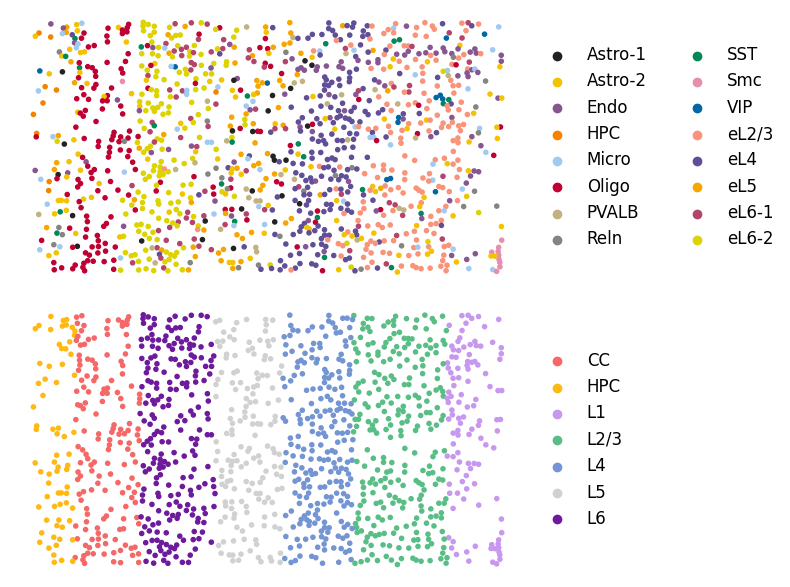

In [6]:
fig, axes = plt.subplots(2, 1, figsize=(8, 6))

ax = axes[0]
plot_cci(adata, ax, color='celltype', palette=celltypeCmap, legend=True)
ax = axes[1]
plot_cci(adata, ax, color='cluster', palette=clusterCmap, legend=True)

fig.tight_layout()
plt.show()

# STAGUE outputs

In [7]:
adata = sc.read_h5ad('./result/V1/adata_processed.h5ad')

In [8]:
adata

AnnData object with n_obs × n_vars = 1207 × 1020
    obs: 'cluster', 'celltype', 'cluster_pred'
    uns: 'cluster_colors', 'log1p'
    obsm: 'embedding', 'spatial'
    obsp: 'knn_adj', 'learned_adj_normalized', 'learned_adj_raw'

## Clustering result

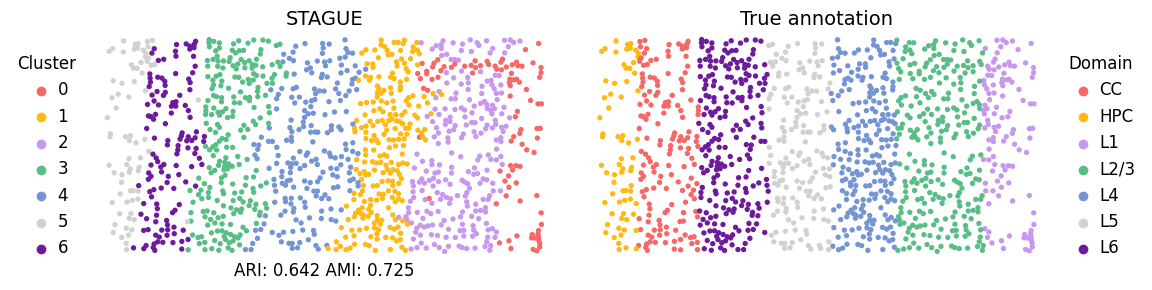

In [9]:
params = {
    's' : 8,
    'title_size': 14,
    'legend_size': 12,
    'text_size': 12,
    'pad': 0
}

fig, axes = plt.subplots(1, 2, figsize=(10, 3))


labels_true = adata.obs['cluster'].values
labels_pred = adata.obs['cluster_pred'].values

# STAGUE
ax = axes[0]
title = 'STAGUE'
coord = adata.obsm['spatial']
plot_cluster_pred(coord, ax, title, params, labels_true=labels_true, labels_pred=labels_pred)
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, frameon=False, bbox_to_anchor=(0.02, 0.85), handletextpad=0, title='Cluster')

ax = axes[1]
coord = adata.obsm['spatial']
plot_cluster_pred(coord, ax, 'True annotation', params, labels_true=labels_true)
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, frameon=False, bbox_to_anchor=(1.08, 0.85), handletextpad=0, title='Domain')

fig.tight_layout()
plt.show()

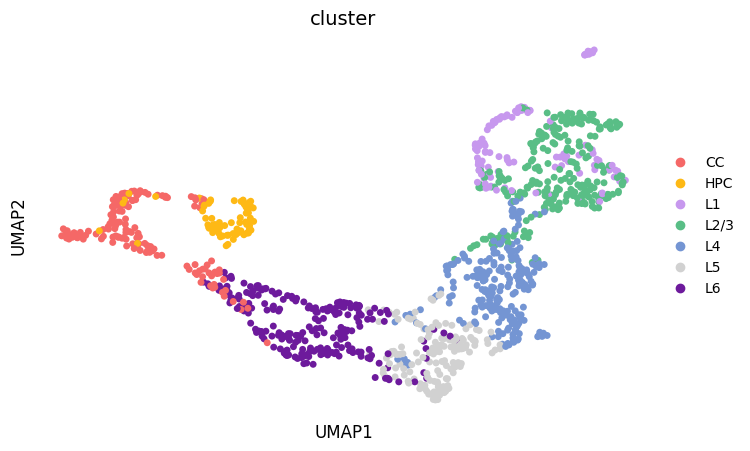

In [10]:
# UMAP visualization
sc.pp.neighbors(adata, use_rep='embedding')
sc.tl.umap(adata)

fig, ax = plt.subplots(1, 1, figsize=(8,5))
sc.pl.umap(adata, ax=ax, color='cluster', palette=clusterCmap, legend_fontsize=10)

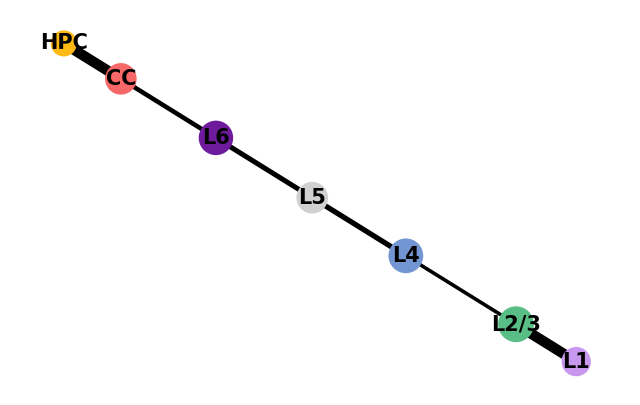

In [11]:
# PAGA trajectory
sc.tl.paga(adata, groups='cluster')

fig, ax = plt.subplots(1, 1, figsize=(8,5))
sc.pl.paga(adata, ax=ax, edge_width_scale=1, fontsize=15, node_size_scale=3)

## CCI

In [12]:
adj = adata.obsp['learned_adj_raw'].toarray()
thd = 0.65
adj = np.where(adj > thd, 1, 0)
adj

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

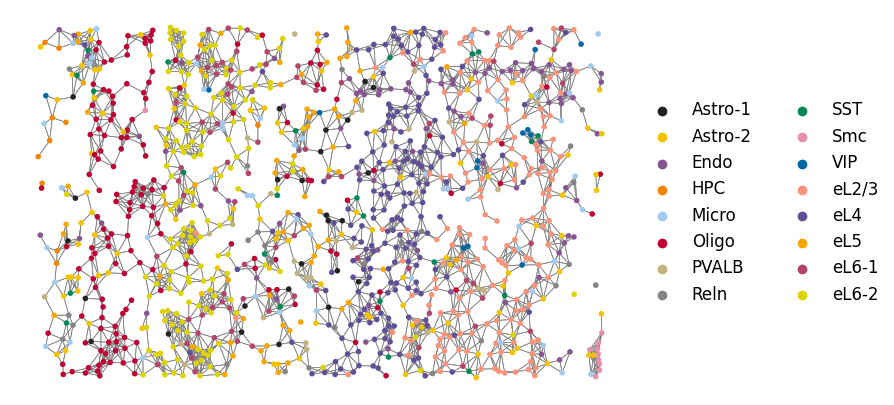

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(8,5))
plot_cci(adata, ax, adj=adj, color='celltype', palette=celltypeCmap)